In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_circles,make_blobs
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

X (50, 2)
[1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 1 0 1 0 0 1]


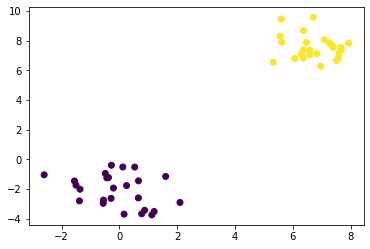

In [5]:
X,y = make_blobs(n_samples=50, n_features=2,centers=2)
print('X', X.shape)
print(y)
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y)

[[0.58288709 0.81150998]]
[-4.25174547]


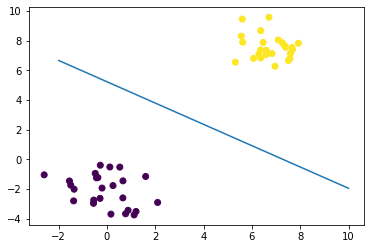

In [6]:
model = LogisticRegression()
model.fit(X,y)
print(model.coef_)
print(model.intercept_)


w0 = model.intercept_[0]
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]

m = -w1/w2
b = -w0/w2

plt.figure()
plt.scatter(X[:,0],X[:,1], c=y)
plt.plot([-2,10], [-2*m+b, 10*m+b])
plt.show()

In [28]:
class myLogisticRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    def h(self,x):
        ns, nf = X.shape
        c1 = np.ones((ns, 1))
        XX = np.concatenate((c1, X), axis = 1)
        W = np.zeros((nf+1, 1))
        W[0, 0] = self.intercept_
        W[1:, 0] = self.coef_
        WtX = np.dot(XX, W)
        r = 1/(1 + np.exp(-WtX))
        return r.flatten()
    def cost(self, X, y):
        hx = self.h(X)
        c = -np.sum(y*np.log(hx) + (1-y)*np.log(1-hx))
        return c
    def dCost(self, X, y):
        ns, nf = X.shape
        hx = self.h(X)
        c1 = np.ones((ns, 1))
        xx = np.concatenate((c1, X), axis = 1)
        dC = np.zeros((nf+1))
        for i in range(nf+1):
            dC[i] = np.sum((hx - y)*(XX[:, i]))
        return dC
    def optimize(self, X, y):
        ns, nf = X.shape
        NMaxIter = 10000
        self.coef_ = np.ones(( nf ))
        self.intercept_ = 1
        W = np.zeros((nf+1))
        W[0] = self.intercept_
        W[1:] = self.coef_
        #print(('h(X[0])',self.h(X[0,:])))
        #print('C:', self.cost(X, y))
        #print('dC:', self.cost(X, y))
        dC = self.dCost(X, y)
        ndC = np.linalg.norm(dC)
        
        eps = 1e-5
        k = 0
        while k < NMaxIter and ndC > eps:
            alpha = 0.1
            dir = -dC/ndC
            P = W + alpha*P
            self.intercept_ = W[0]
            self.coef_ = W[1: ]
            
            #print(self.intercept_, self.coef_)
            dC = self.dCost(X, y)
            ndC = np.linalg.norm(dC)
            k = k + 1
            if k % 100:
                print('cost:', c)
        
        
    def fit(self,X,y):
        self.optimize(X, y)

    def predict(self):
        pass

In [29]:
model = myLogisticRegression()
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

NameError: name 'XX' is not defined